Dataset link : https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/intrusion.csv")
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


Preprocessing

In [3]:
df = df.drop(columns=["session_id"])

In [4]:
cat_cols = ["protocol_type", "encryption_used", "browser_type"]
for col in cat_cols:
    df[col] = pd.factorize(df[col])[0]

In [5]:
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]

Splitting

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model

In [8]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    learning_rate_init=0.0005,
    max_iter=1000,
    random_state=99,
)

In [9]:
from sklearn.utils.class_weight import compute_sample_weight

weights = compute_sample_weight(class_weight='balanced', y=y_train)
model.fit(X_train_scaled, y_train, sample_weight=weights)

,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.0005
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,99


In [10]:
y_pred = model.predict(X_test_scaled)

In [11]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8359538784067087

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1022
           1       0.84      0.80      0.82       886

    accuracy                           0.84      1908
   macro avg       0.84      0.83      0.83      1908
weighted avg       0.84      0.84      0.84      1908



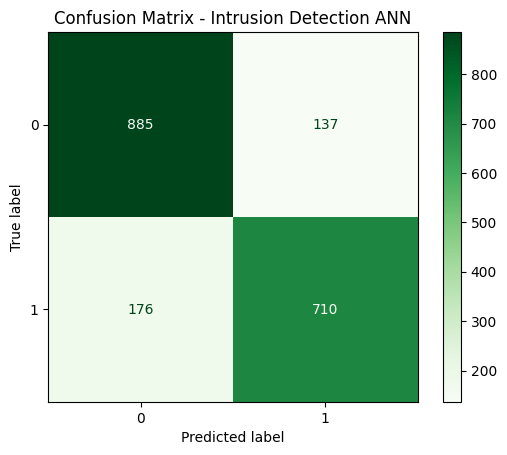

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Intrusion Detection ANN")
plt.show()